<a href="https://colab.research.google.com/github/dantecomedia/ECommerce-Retail/blob/master/retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls

gdrive	sample_data


In [0]:
content/gdrive/My Drive/data.csv


In [0]:

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
data=pd.read_csv("/content/gdrive/My Drive/data.csv", encoding="ISO-8859-1")



            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  541909.000000
mean        9.552250       4.611114   15272.795237
std       218.081158      96.759853    1737.934523
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13798.000000
50%         3.000000       2.080000   15145.000000
75%        10.000000       4.130000   16803.000000
max     80995.000000   38970.000000   18287.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    541909 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     541909 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


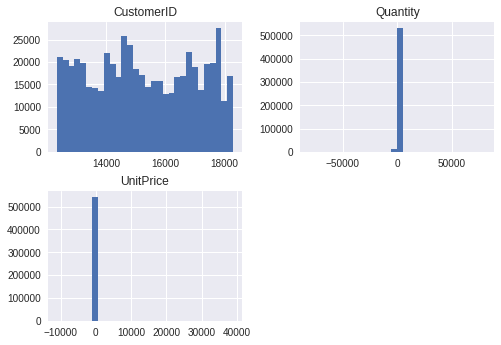

In [0]:

data=data.fillna(method="ffill")

data.hist(bins=30)

print(data.describe())
print(data.info())


In [0]:
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [0]:
X=data.iloc[:,[2,6]]
y=data.iloc[:,-1]

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['Description']=le.fit_transform(X['Description'])
y=le.fit_transform(y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=None)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=3,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
y_pred=rfc.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [0]:

def model_tester():
    for i in range(1,21):
        rfc=RandomForestClassifier(n_estimators=i,criterion='gini')
        rfc.fit(X_train,y_train)
        y_pred=rfc.predict(X_test)
        accuracy=accuracy_score(y_test,y_pred)
        print("Estimator",i,end="\n")
        print(accuracy, end="\n")
        plt.plot(sorted(y_pred),color='red')
        plt.plot(sorted(y_test),color='blue')
        plt.show()

Estimator 1
0.9629091070136849


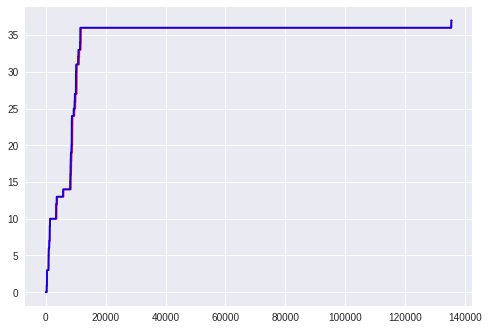

Estimator 2
0.9621414547011323


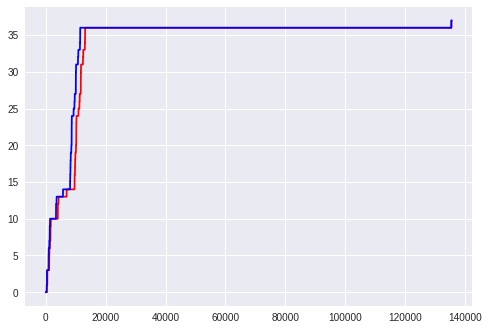

Estimator 3
0.9668654689322251


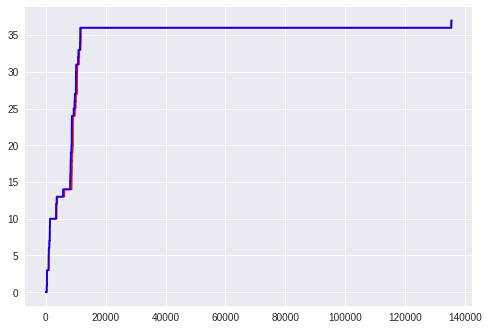

Estimator 4
0.9650865823233292


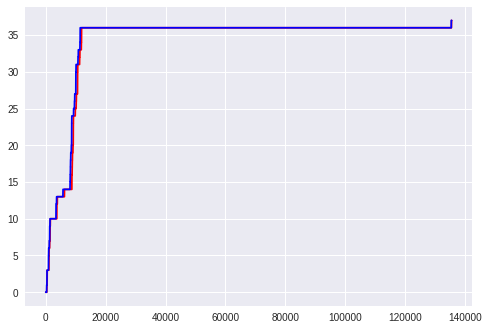

Estimator 5
0.9683343421072056


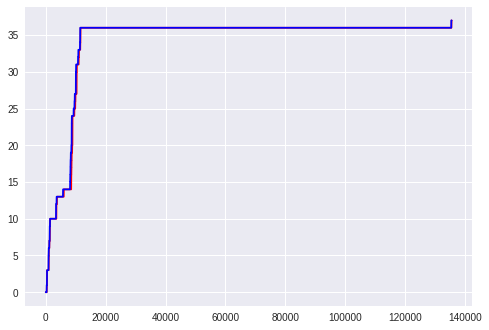

Estimator 6
0.9706815866782799


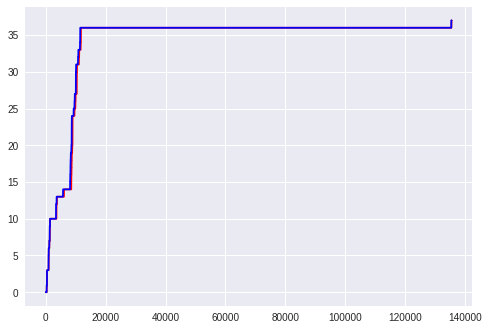

Estimator 7
0.9719880718640664


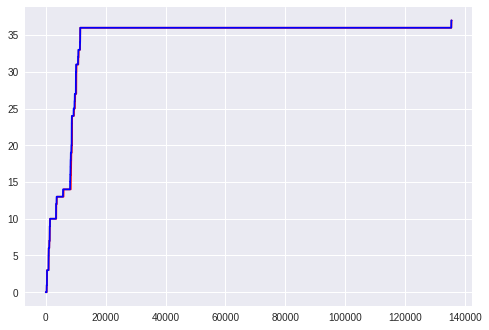

Estimator 8
0.9721652223977325


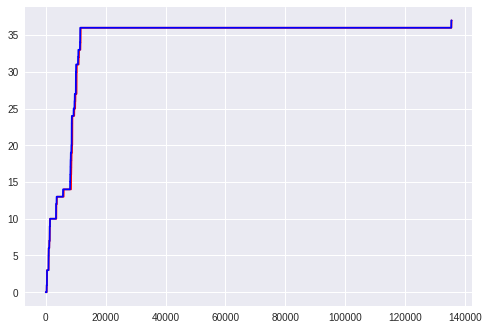

Estimator 9
0.971862590236053


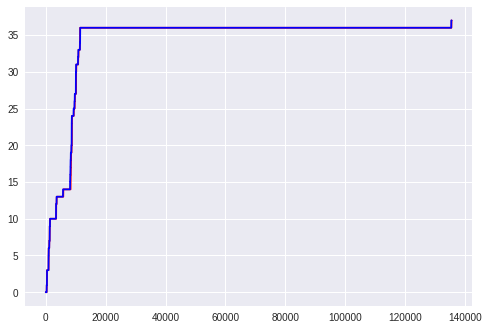

Estimator 10
0.9723202291146902


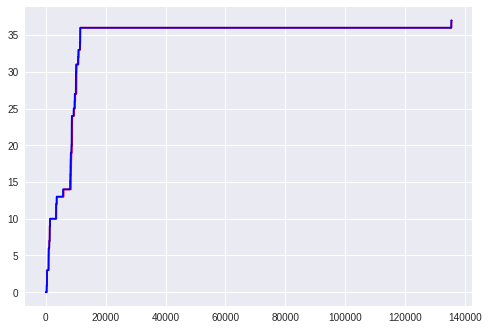

Estimator 11
0.9724309481982314


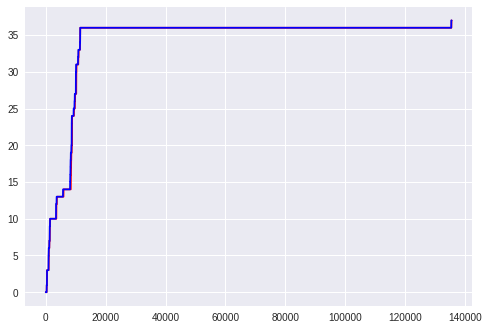

Estimator 12
0.9719216404139418


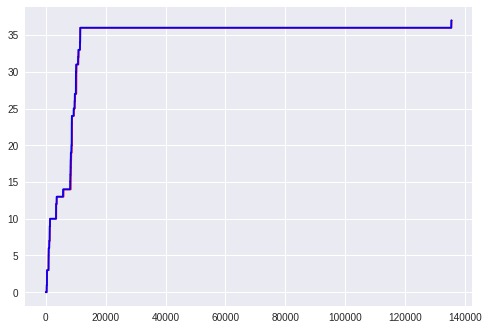

Estimator 13
0.9735676641225882


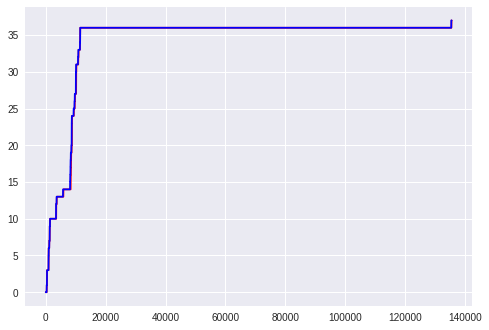

Estimator 14
0.9735602828503521


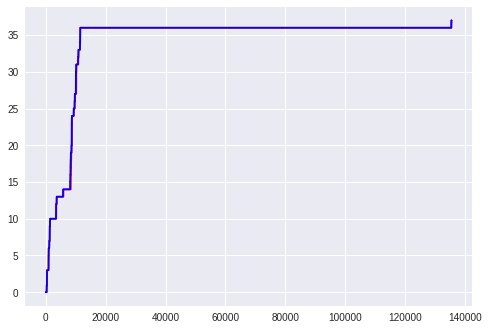

Estimator 15
0.9732576506886726


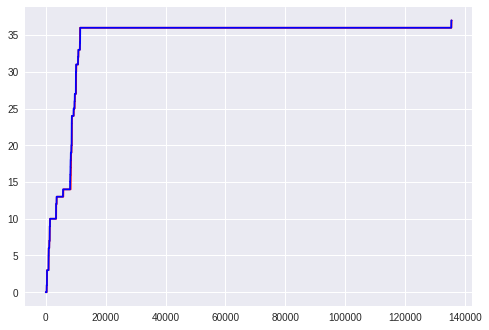

Estimator 16
0.9728664432601604


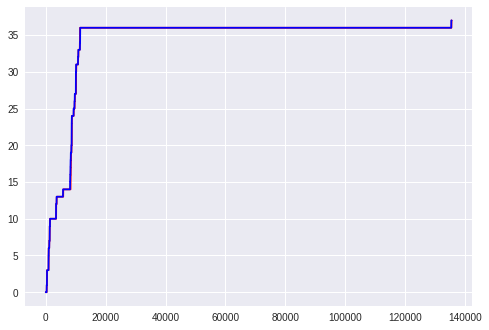

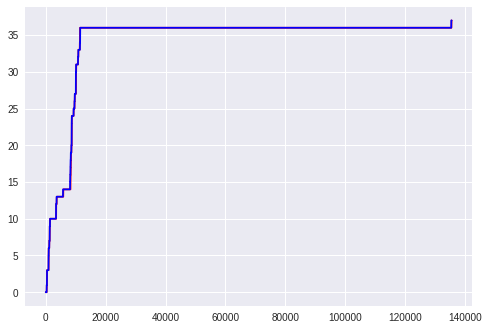

Estimator 18
0.9740991157235861


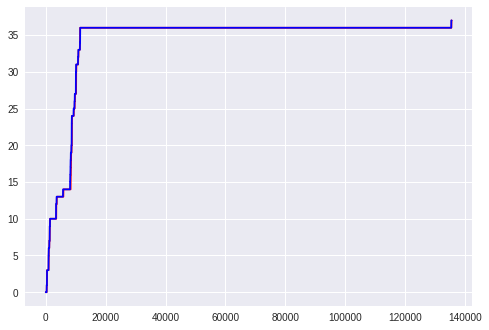

Estimator 19
0.9734274199501026


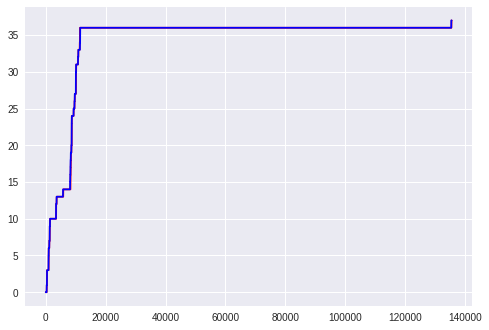

Estimator 20
0.9728295368989799


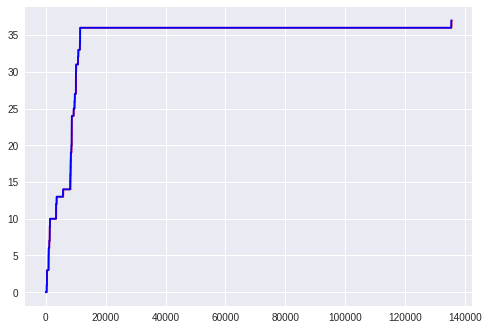

In [0]:
model_tester()